The CDC publishes firearm mortality for each State per 100,000 persons https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm. Each State' firearm control laws can be categorized as very strict to very lax. The purpose of this Story is to answer the question, " Do stricter firearm control laws help reduce firearm mortality?"

For this assignment you will need to:

*   Access the firearm mortality data from the CDC using an available API (https://open.cdc.gov/apis.html)
*   Create a 5 point Likert scale categorizing gun control laws from most lax to strictest and assign each state to the most appropriate Likert bin.
*   Determine whether stricter gun control laws result in reduced gun violence deaths
*   Present your story using  heat maps

Notes:

You may not use the same desktop application that you have used for a previous story.

If you use color in your visuals you must use an accessible color palette.



# Introduction

Using data from the Centers for Disease Control and Prevention (CDC) and the Giffords Law Center, this assignment aims to explore the topic of whether stricter gun laws reduce firearm related deaths. The strictness of gun control laws will be based on a grade from the Giffords Law Center, a nonprofit organization that promotes gun control legislation in the United States. They score and rank every state based on how strong the state's gun control laws are. They are graded from A to F with A being the strongest gun control law. I will be using their grading system to create a 5 point Likert scale. This will allow us to analyze the relationship between the strictness of gun control laws and firearm mortality rates.

# Gathering and Cleaning the Data

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
url = "https://data.cdc.gov/resource/489q-934x.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
0,2021 Q1,12 months ending with quarter,All causes,Age-adjusted,"Deaths per 100,000",866.3,716.3,1040.4,NaN,NaN,...,882.7,1056.8,922.0,771.2,824.8,737.9,714.8,825.8,1096.9,854.0
1,2021 Q1,12 months ending with quarter,Alzheimer disease,Age-adjusted,"Deaths per 100,000",32.1,36.8,24.8,NaN,NaN,...,37.4,42.8,44.9,41.1,28.3,34.3,42.0,31.7,35.2,32.1
2,2021 Q1,12 months ending with quarter,COVID-19,Age-adjusted,"Deaths per 100,000",120.7,94.0,153.9,NaN,NaN,...,145.8,122.5,162.3,68.7,92.0,21.5,46.5,86.1,94.2,84.0
3,2021 Q1,12 months ending with quarter,Cancer,Age-adjusted,"Deaths per 100,000",142.0,122.8,167.7,NaN,NaN,...,147.0,161.9,137.0,116.2,144.3,151.9,139.8,146.9,176.3,138.0
4,2021 Q1,12 months ending with quarter,Chronic liver disease and cirrhosis,Age-adjusted,"Deaths per 100,000",13.9,9.8,18.3,NaN,NaN,...,29.0,16.8,16.4,10.7,11.8,12.0,15.0,12.8,17.4,29.1


In [4]:
df = df[df['cause_of_death'] == 'Firearm-related injury']
df = df[df['time_period'] == '12 months ending with quarter']
df = df[df['year_and_quarter'] == '2021 Q4']
df = df[df['rate_type'] == 'Age-adjusted']
df.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
141,2021 Q4,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.6,4.2,25.3,NaN,NaN,...,14.3,22.8,15.6,13.9,14.3,11.9,11.2,13.5,17.3,26.1


In [5]:
df = df.iloc[:, 18:]

In [6]:
df = pd.melt(df, var_name='state', value_name='rate')

df['state'] = df['state'].str.replace('rate_', '')
df['state'] = df['state'].str.replace('_', ' ')
df['state'] = df['state'].str.title()

In [7]:
state_abbreviation = {
  'Alaska': 'AK',
  'Alabama': 'AL',
  'Arkansas': 'AR',
  'Arizona': 'AZ',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'District Of Columbia': 'DC',
  'Delaware': 'DE',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Iowa': 'IA',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Massachusetts': 'MA',
  'Maryland': 'MD',
  'Maine': 'ME',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Missouri': 'MO',
  'Mississippi': 'MS',
  'Montana': 'MT',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Nebraska': 'NE',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'Nevada': 'NV',
  'New York': 'NY',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Virginia': 'VA',
  'Vermont': 'VT',
  'Washington': 'WA',
  'Wisconsin': 'WI',
  'West Virginia': 'WV',
  'Wyoming': 'WY'
  }

In [8]:
df['abbreviation'] = df['state'].map(state_abbreviation)
df.head()

,state,rate,abbreviation
0,Alaska,25.2,AK
1,Alabama,26.4,AL
2,Arkansas,23.3,AR
3,Arizona,18.3,AZ
4,California,9.0,CA


In [9]:
url = "https://giffords.org/lawcenter/resources/scorecard2021/?scorecard=AK"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find_all('table')[0]
grade = pd.read_html(str(table))[0]

grade.head()

,Gun Law Strength (Ranked),State,Grade,Gun Death Rate (Ranked),Gun Death Rate (per 100K)
0,31,Alabama,F,5,23.6
1,41,Alaska,F,6,23.5
2,42,Arizona,F,20,16.7
3,50,Arkansas,F,8,22.6
4,1,California,A,44,8.5


In [10]:
# Merging the two dataframes together on state
df = pd.merge(df, grade.iloc[:,:3], left_on='state', right_on='State', how='left')
df = df.rename(columns={'Gun Law Strength  (Ranked)': 'rank'})
df = df.loc[:, ['state', 'rate', 'abbreviation', 'Grade', 'rank']]

In [11]:
df.head()

,state,rate,abbreviation,Grade,rank
0,Alaska,25.2,AK,F,41
1,Alabama,26.4,AL,F,31
2,Arkansas,23.3,AR,F,50
3,Arizona,18.3,AZ,F,42
4,California,9.0,CA,A,1


In [12]:
df['Grade'].value_counts()

F     24
A-     6
B      5
C-     5
C+     3
A      2
B-     2
D-     1
C      1
D      1
Name: Grade, dtype: int64

In [13]:
# Taking out all the + and - so that I can get 5 grades
df['Grade'] = df['Grade'].str.replace('+',"")
df['Grade'] = df['Grade'].str.replace('-',"")

<ipython-input-13-45b32d3ed2e7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Grade'] = df['Grade'].str.replace('+',"")


In [14]:
# Creating number grades for the states
def grade_to_likert(grade):
    if grade == 'A':
        return 5
    elif grade == 'B':
        return 4
    elif grade == 'C':
        return 3
    elif grade == 'D':
        return 2
    else:
        return 1

df['Likert'] = df['Grade'].apply(grade_to_likert)
df.head()

,state,rate,abbreviation,Grade,rank,Likert
0,Alaska,25.2,AK,F,41,1
1,Alabama,26.4,AL,F,31,1
2,Arkansas,23.3,AR,F,50,1
3,Arizona,18.3,AZ,F,42,1
4,California,9.0,CA,A,1,5


# Exploratory Data Analysis

In [15]:
df.groupby('Likert')['rate'].mean()

Likert
1    20.256000
2    17.450000
3    15.566667
4    13.600000
5     8.225000
Name: rate, dtype: float64

In [16]:
correlation = df['Likert'].corr(df['rate'])
print(correlation)

-0.6323505874367706


There seems to be a negative correlation between strict gun control laws and rate of gun deaths. As the gun law becomes stricter, the rate of mortality decreases.

In [17]:
sort_df = df.sort_values('rate',ascending=False)
sort_df.head()

,state,rate,abbreviation,Grade,rank,Likert
25,Mississippi,33.9,MS,F,45,1
18,Louisiana,29.1,LA,F,34,1
32,New Mexico,27.8,NM,C,19,3
1,Alabama,26.4,AL,F,31,1
50,Wyoming,26.1,WY,F,49,1


In [18]:
sort_df.tail()

,state,rate,abbreviation,Grade,rank,Likert
39,Rhode Island,5.6,RI,B,9,4
34,New York,5.4,NY,A,6,5
31,New Jersey,5.2,NJ,A,2,5
11,Hawaii,4.8,HI,A,4,5
19,Massachusetts,3.4,MA,A,5,5


The highest mortality rate comes from Mississippi which has very lax gun control laws. On the other hand, Massachusetts has the lowest rate and has very strict gun control laws.

# Data Visualizations

In [19]:
shape_path = 'DATA 608/Story 3/cb_2018_us_state_500k/cb_2018_us_state_500k.shpshape = gpd.read_file(shape_path)
shape = pd.merge(left = shape, right = df, left_on = 'NAME', right_on= 'state', how='left')
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48 entries, 0 to 55
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STATEFP       48 non-null     object  
 1   STATENS       48 non-null     object  
 2   AFFGEOID      48 non-null     object  
 3   GEOID         48 non-null     object  
 4   STUSPS        48 non-null     object  
 5   NAME          48 non-null     object  
 6   LSAD          48 non-null     object  
 7   ALAND         48 non-null     int64   
 8   AWATER        48 non-null     int64   
 9   geometry      48 non-null     geometry
 10  state         48 non-null     object  
 11  rate          48 non-null     float64 
 12  abbreviation  48 non-null     object  
 13  Grade         48 non-null     object  
 14  rank          48 non-null     object  
 15  Likert        48 non-null     float64 
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 6.4+ KB


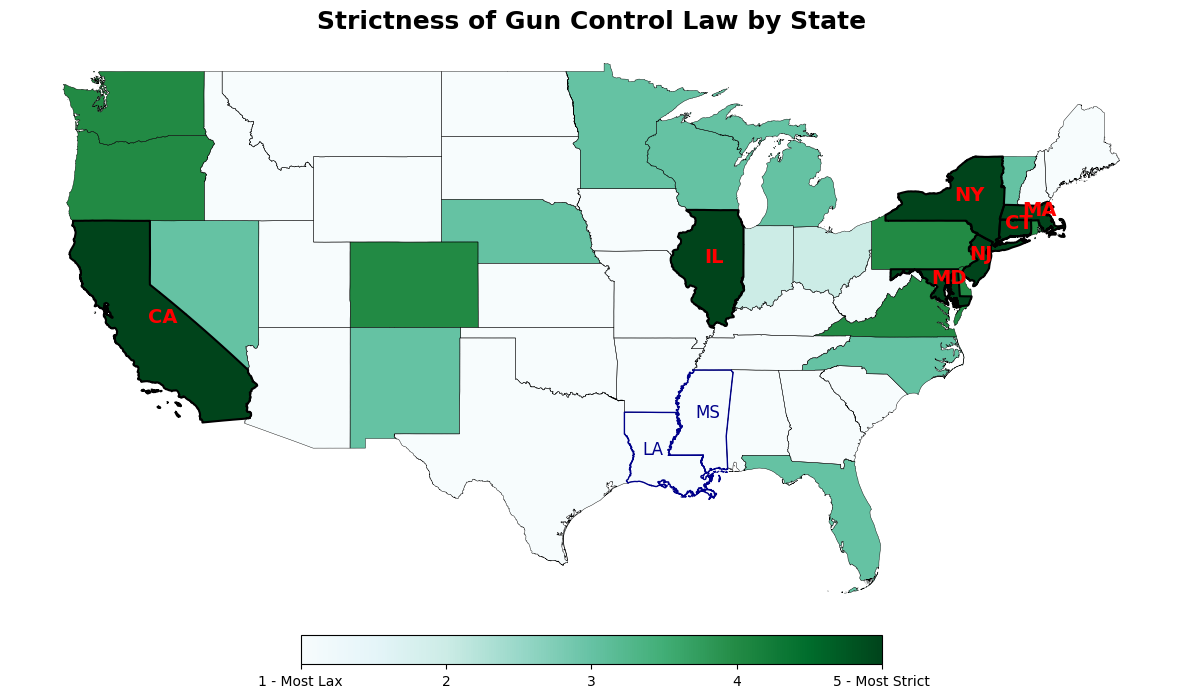

In [20]:
# States by gun Law
fig, ax = plt.subplots(figsize=(15,10))

shape.plot(ax=ax, column='Likert', cmap='BuGn')
shape.boundary.plot(edgecolor='black', linewidth=0.3, ax=ax)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','bottom','top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Strictness of Gun Control Law by State', size=18, weight='bold')

shape[shape['Likert'] > 4].boundary.plot(edgecolor='black', linewidth=1.5, ax=ax)

for idx, row in shape.iterrows():
    if row['Likert'] > 4:
        ax.text(row.geometry.centroid.x-0.5, row.geometry.centroid.y, row['abbreviation'], fontsize=14, color='red', weight='bold')

mississippi_loc = shape.loc[shape['abbreviation'] == 'MS', 'geometry'].values[0].centroid
mississippi = shape[shape['abbreviation'] == 'MS']
mississippi.boundary.plot(ax=ax, color='darkblue', linewidth=1)
ax.annotate('MS', xy=(mississippi_loc.x, mississippi_loc.y), xytext=(mississippi_loc.x-.5, mississippi_loc.y), color='darkblue',fontsize=12)

louisiana_loc = shape.loc[shape['abbreviation'] == 'LA', 'geometry'].values[0].centroid
louisiana = shape[shape['abbreviation'] == 'LA']
louisiana.boundary.plot(ax=ax, color='darkblue', linewidth=1)
ax.annotate('LA', xy=(louisiana_loc.x, louisiana_loc.y), xytext=(louisiana_loc.x-1.1, louisiana_loc.y), color='darkblue',fontsize=12)

cmap = plt.cm.BuGn
norm = mcolors.Normalize(vmin=1, vmax=5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(1, 6), orientation='horizontal',pad=0.02, shrink=0.5, ax=ax)
cbar.ax.set_xticklabels(['1 - Most Lax', '2', '3', '4', '5 - Most Strict'])

plt.show()

Several states have gun control laws that are considered "Most strict", these are highlighted in red. Mississippi and Louisiana have the highest mortality and they seem to be "Most Lax" when it comes to gun laws.

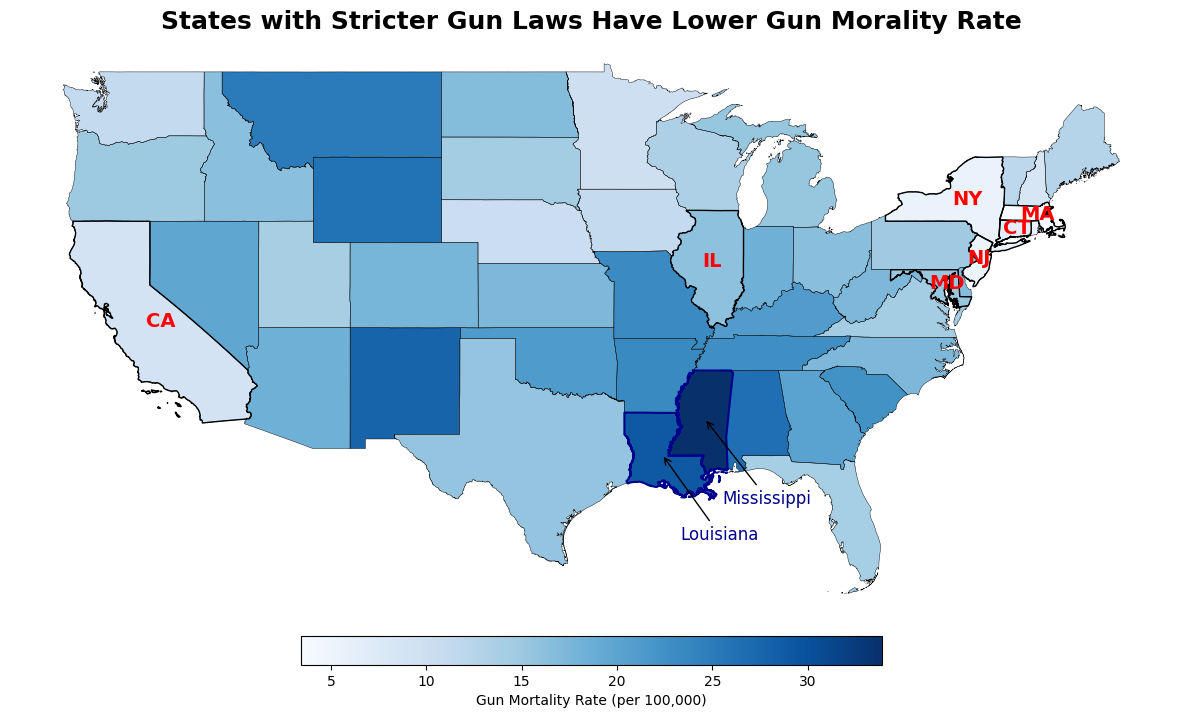

In [21]:
# Morality rate by state
fig, ax = plt.subplots(figsize=(15,10))

shape.plot(ax=ax, column='rate', cmap='Blues')
shape.boundary.plot(edgecolor='black', linewidth=0.3, ax=ax)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','bottom','top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('States with Stricter Gun Laws Have Lower Gun Morality Rate', size=18, weight='bold')

shape[shape['Likert'] > 4].boundary.plot(edgecolor='black', linewidth=1, ax=ax)

for idx, row in shape.iterrows():
    if row['Likert'] > 4:
        ax.text(row.geometry.centroid.x-0.6, row.geometry.centroid.y-.2, row['abbreviation'], fontsize=14, color='r', weight='bold')

mississippi_loc = shape.loc[shape['abbreviation'] == 'MS', 'geometry'].values[0].centroid
mississippi = shape[shape['abbreviation'] == 'MS']
mississippi.boundary.plot(ax=ax, color='darkblue', linewidth=1.5)
ax.annotate('Mississippi', xy=(mississippi_loc.x, mississippi_loc.y), xytext=(mississippi_loc.x+1, mississippi_loc.y-4),
            arrowprops=dict(facecolor='darkblue', arrowstyle= '->'), color='darkblue',fontsize=12)


louisiana_loc = shape.loc[shape['abbreviation'] == 'LA', 'geometry'].values[0].centroid
louisiana = shape[shape['abbreviation'] == 'LA']
louisiana.boundary.plot(ax=ax, color='darkblue', linewidth=1.5)
ax.annotate('Louisiana', xy=(louisiana_loc.x, louisiana_loc.y), xytext=(louisiana_loc.x+1, louisiana_loc.y-4),
            arrowprops=dict(facecolor='darkblue', arrowstyle= '->'), color='darkblue',fontsize=12)

cmap = plt.cm.Blues
norm = mcolors.Normalize(vmin=shape['rate'].min(), vmax=shape['rate'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.02, shrink=0.5, ax=ax)
cbar.set_label('Gun Mortality Rate (per 100,000)')

plt.show()

The states that are "Most Strict" with gun control laws are highlighted in red. They have a lighter shade of blue indicating that their gun mortality rate is low where as the two states with "Most Lax" gun laws are in dark blue indicating they have a high mortality rate.

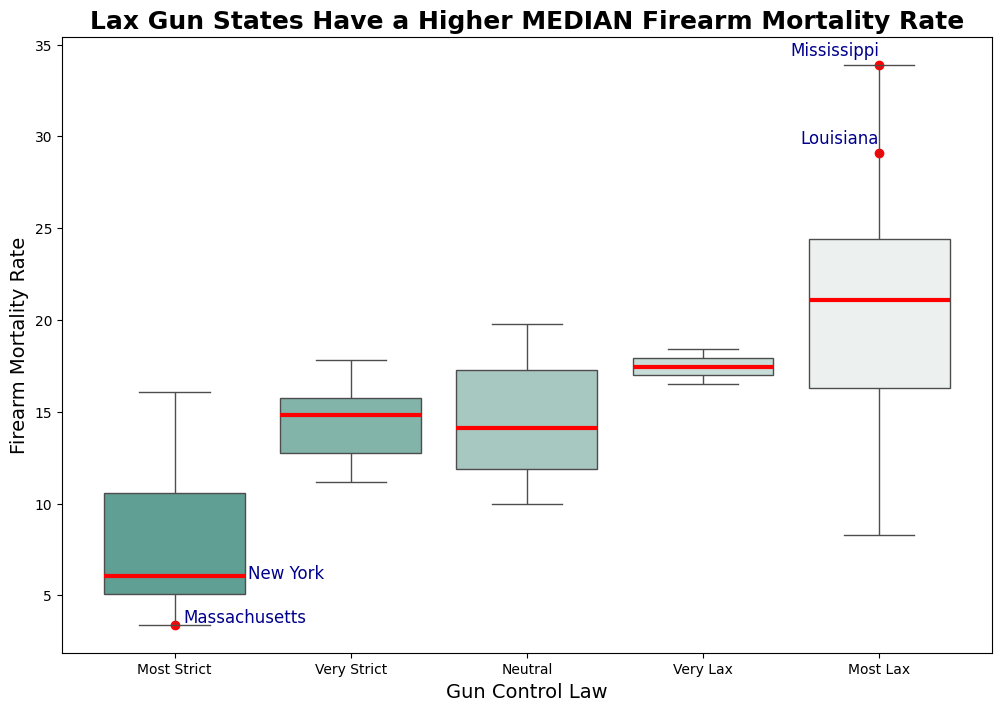

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
labels = {0: 'Most Lax', 1: 'Very Lax', 2: 'Neutral', 3: 'Very Strict', 4: 'Most Strict'}
palette = sns.color_palette("light:#5A9", len(labels))
medianprops = {'color': 'red', 'linewidth': 3}

sns.boxplot(x='Likert', y='rate', data=df, hue="Likert", palette=palette,showfliers=False, medianprops=medianprops)

plt.gca().invert_xaxis()
plt.xticks(list(labels.keys()), list(labels.values()))

mississippi_likert = 0
mississippi_rate = df.loc[df['state'] == 'Mississippi', 'rate'].values[0]
plt.scatter(mississippi_likert, mississippi_rate, color='red')
plt.text(mississippi_likert, mississippi_rate + 0.5, 'Mississippi', ha='right',fontsize=12, color='darkblue')

louisiana_likert = 0
louisiana_rate = df.loc[df['state'] == 'Louisiana', 'rate'].values[0]
plt.scatter(louisiana_likert, louisiana_rate, color='red')
plt.text(louisiana_likert, louisiana_rate + 0.5, 'Louisiana', ha='right',fontsize=12, color='darkblue')

massachusetts_likert = 4
massachusetts_rate = 3.4
plt.scatter(massachusetts_likert, massachusetts_rate, color='red')
plt.text(massachusetts_likert-.75, massachusetts_rate+.1, 'Massachusetts', ha='right',fontsize=12, color='darkblue')

new_york_likert = 4
new_york_rate = 5.4
plt.scatter(new_york_likert, new_york_rate, color='red')
plt.text(new_york_likert-0.85, new_york_rate+0.5, 'New York', ha='right',fontsize=12, color='darkblue')


plt.legend().remove()
plt.title('Lax Gun States Have a Higher MEDIAN Firearm Mortality Rate',fontsize=18,weight='bold')
ax.set_xlabel("Gun Control Law",fontsize=14)
ax.set_ylabel("Firearm Mortality Rate",fontsize=14)

plt.show()

This boxplot pretty much summarizes the two heatmaps. It is obvious that states with stricter gun control laws have a lower firearm mortality rate. The median mortality rate goes up as the gun laws become more lax.

# Conclusion

In conclusion, this analysis of gun control laws and firearm mortality rates across different states reveals a noteworthy pattern. States with more lax gun control laws tend to have higher firearm mortality rates. This is most evident in states like Mississippi and Louisiana which have lax gun laws but also the highest firearm mortality rates. On the other hand, states with the most strict gun control laws like New York and Massachusetts have two of the lowest firearm mortality rates. There is a caveat in this analysis in that the grading system for strictness of gun policy is based on research done by the  Giffords Law Center. This organization is known to conduct litigation against the gun industry so there might be some bias in their data. Despite the potential bias, the correlation between gun control strictness and firearm mortality rates cannot be ignored. The data suggests that stricter gun control laws could be a key factor in reducing firearm mortality rates